# Week 4 Assignment
## Los Angeles Chinatown Demographic Analysis Using the Aerican Community Survey (ACS)

Objective: Fix geographies and develop a methodology to more efficiently extract census data only from census block groups of interest. Using this new methodology, recreate maps generated in last week's census exploration assignments.

Note: Various categories and topics from the 2020 Decennial Census are not yet available.

Topics:
- Income by census block group
- Tenure Status by census block group
- Race
- Housing Units Age
- Rent

Steps:
- Extract census block groups from Chinatown and keep geometry data
- Merge census data to Chinatown block groups
- Use For loops to create multiple maps if census data includes multiple  categories/variables


<div class="alert alert-info">
Start by importing modules to gain access to their functions for data analysis.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
import plotly.express as px
import plotly.io as pio

2020 Census Data for Los Angeles County at the block group level

In [2]:
# Read and add csv as 'census_race'.
census2020_race = pd.read_csv('Data/Census 2020 (Redistricting Data) - Race and Hispanic.csv',
                              dtype = {
                                  'FIPS':str,
                                  'Geo_STATE':str,
                                  'Geo_COUNTY':str }
                             )

In [3]:
census2020_race.head()

FIPS  2020 Total Population  Non-Hispanic 2020  Hispanic 2020  \
0  060371011101                   2050               1514            536   
1  060371011102                   1886               1253            633   
2  060371011103                    990                778            212   
3  060371011221                   2299               1977            322   
4  060371011222                   1429               1209            220   

   2010 Total Population  Non-Hispanic 2010  Hispanic 2010  Population Change  \
0                   1969               1474            495                 81   
1                   1786               1201            585                100   
2                    976                732            244                 14   
3                   2300               1936            364                 -1   
4                   1364               1153            211                 65   

   Non-Hispanic Change  Hispanic Change  ...  Other Change Percent  \
0                   40               41  ...             36.170213   
1                   52               48  ...             11.929825   
2                   46              -32  ...             -5.454545   
3                   41              -42  ...             36.781609   
4                   56                9  ...             31.428571   

   Two or More Races Change Percent  Total Population Change Percent Points  \
0                         71.698113                           -2.220000e-15   
1                        238.157895                            5.330000e-15   
2                         85.454545                            2.660000e-15   
3                        128.235294                            8.880000e-16   
4                         98.550725                            2.660000e-15   

   White Change Percent Points  \
0                    -6.055618   
1                    -9.456073   
2                    -2.535188   
3                    -3.055714   
4                    -4.744566   

   African American or Black Change Percent Points  \
0                                        -0.133062   
1                                        -0.525116   
2                                         0.194776   
3                                        -0.086597   
4                                         0.326552   

   American Indian and Alaska Native Change Percent Points  \
0                                           0.323403         
1                                           0.697780         
2                                           0.295786         
3                                           0.261097         
4                                           0.533154         

   Asian Change Percent Points  \
0                    -1.448426   
1                    -1.253772   
2                    -1.753809   
3                    -3.255139   
4                    -1.876402   

   Native Hawaiian and Other Pacific Islander Change Percent Points  \
0                                           0.144335                  
1                                           0.209120                  
2                                          -0.103908                  
3                                           0.000000                  
4                                          -0.073314                  

   Other Change Percent Points  Two or More Races Change Percent Points  
0                     3.674764                                 3.494605  
1                     0.956657                                 9.371404  
2                    -0.765441                                 4.667784  
3                     1.393555                                 4.742799  
4                     1.306104                                 4.528473  

[5 rows x 56 columns]

### Cleaning the Data

#### **Los Angeles Chinatown Geography - Block Groups**

In [4]:
# Import Los Angeles Neighborhood Boundaries dataset
la_neighborhoods = gpd.read_file('Data/LA_Times_Neighborhood_Boundaries.zip')
la_neighborhoods.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


OBJECTID                    name  \
0         1         Adams-Normandie   
1         2                  Arleta   
2         3       Arlington Heights   
3         4         Atwater Village   
4         5  Baldwin Hills/Crenshaw   

                                            geometry  
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...  
1  POLYGON ((-118.44255 34.26412, -118.44240 34.2...  
2  POLYGON ((-118.31862 34.05306, -118.31673 34.0...  
3  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...  
4  POLYGON ((-118.36102 34.02532, -118.36026 34.0...

In [5]:
# Filter dataset to get Chinatown geometry
la_chinatown = la_neighborhoods[la_neighborhoods['name'] == 'Chinatown']
la_chinatown

OBJECTID       name                                           geometry
20        21  Chinatown  POLYGON ((-118.22473 34.06758, -118.22703 34.0...

In [6]:
# Import census block group geography
census_block_groups_2020 = gpd.read_file('Data/tl_2020_06_bg.zip')

In [7]:
census_block_groups_2020.head()

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      06      053  001500        1  060530015001  Block Group 1  G5030   
1      06      073  002712        2  060730027122  Block Group 2  G5030   
2      06      073  018601        2  060730186012  Block Group 2  G5030   
3      06      073  018609        3  060730186093  Block Group 3  G5030   
4      06      073  019406        3  060730194063  Block Group 3  G5030   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  3348560       0  +36.6564570  -121.6749086   
1        S   337744       0  +32.7303521  -117.0787620   
2        S   886725       0  +33.2295683  -117.3482855   
3        S   379311       0  +33.2495250  -117.3148675   
4        S   649440       0  +33.2018708  -117.2686502   

                                            geometry  
0  POLYGON ((-121.69184 36.65885, -121.68510 36.6...  
1  POLYGON ((-117.08306 32.72588, -117.08280 32.7...  
2  POLYGON ((-117.35296 33.22489, -117.35294 33.2...  
3  POLYGON ((-117.31819 33.25084, -117.31819 33.2...  
4  POLYGON ((-117.27370 33.19762, -117.27367 33.1...

In [8]:
#census_block_groups_2020.plot()

In [9]:
# Extract census block groups within Chinatown
chinatown_bg = gpd.clip(census_block_groups_2020, la_chinatown)

chinatown_geo_keep = ['GEOID', 'INTPTLAT', 'INTPTLON', 'geometry']

# Update new dataframe to includes desired columns
chinatown_bg = chinatown_bg[chinatown_geo_keep]

/tmp/ipykernel_177/1217736470.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326

  chinatown_bg = gpd.clip(census_block_groups_2020, la_chinatown)
/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [10]:
chinatown_bg

GEOID     INTPTLAT      INTPTLON  \
13260  060372060201  +34.0571230  -118.2311021   
23707  060372071021  +34.0592851  -118.2395097   
15094  060372071012  +34.0603157  -118.2450677   
23706  060372071011  +34.0625255  -118.2444447   
6983   060372071032  +34.0644499  -118.2386266   
13259  060372060102  +34.0640019  -118.2289441   
10236  060372071031  +34.0646919  -118.2434341   
11175  060371976001  +34.0659405  -118.2511285   
13536  060371977002  +34.0656960  -118.2466858   
13537  060371977003  +34.0683153  -118.2427034   
22781  060371977001  +34.0702700  -118.2485182   
13258  060372060101  +34.0718134  -118.2325370   
335    060379800101  +34.0786807  -118.2395140   

                                                geometry  
13260  POLYGON ((-118.23692 34.05880, -118.23678 34.0...  
23707  POLYGON ((-118.24115 34.05906, -118.24134 34.0...  
15094  MULTIPOLYGON (((-118.24389 34.06063, -118.2439...  
23706  POLYGON ((-118.24732 34.06383, -118.24706 34.0...  
6983   POLYGON ((-118.24381 34.06386, -118.24367 34.0...  
13259  POLYGON ((-118.23461 34.06206, -118.23410 34.0...  
10236  POLYGON ((-118.24546 34.06473, -118.24522 34.0...  
11175  POLYGON ((-118.24921 34.06520, -118.24920 34.0...  
13536  POLYGON ((-118.24579 34.06690, -118.24415 34.0...  
13537  POLYGON ((-118.24564 34.07098, -118.24206 34.0...  
22781  POLYGON ((-118.24591 34.06893, -118.24616 34.0...  
13258  MULTIPOLYGON (((-118.23923 34.06726, -118.2389...  
335    POLYGON ((-118.22545 34.07192, -118.22556 34.0...

<AxesSubplot: >

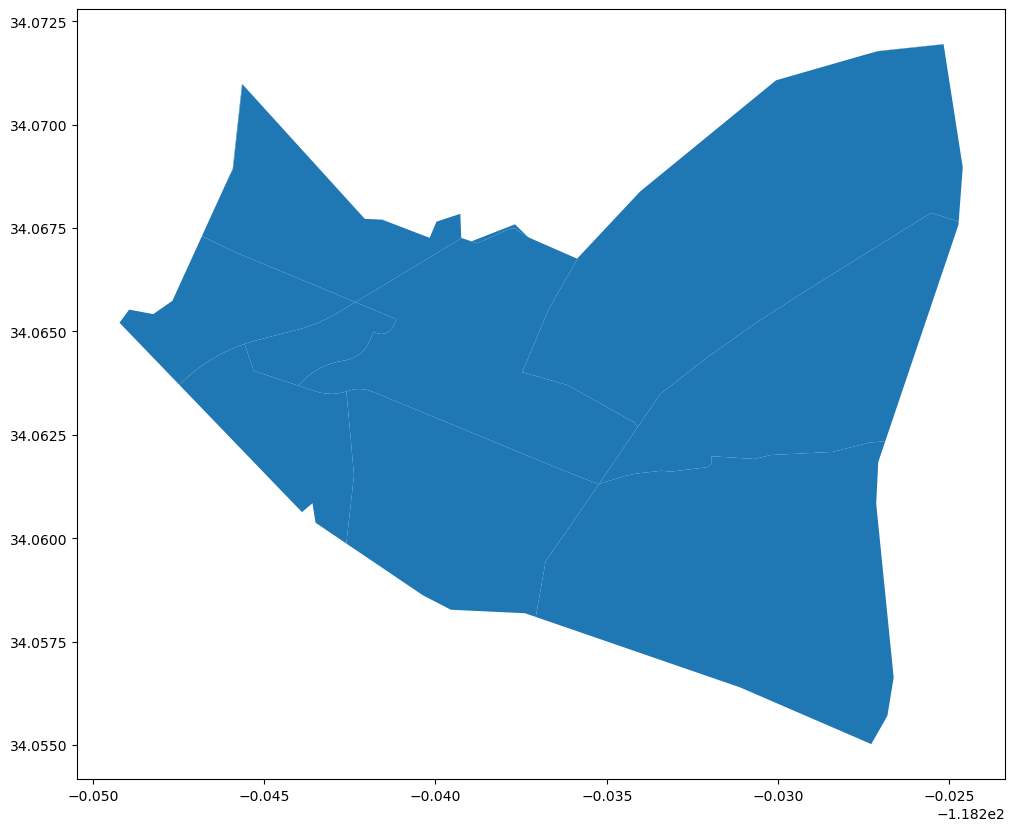

In [11]:
chinatown_bg.plot(figsize=(12,10))

In [12]:
# Chinatown block groups
chinatown_bg_list = chinatown_bg['GEOID'].tolist()
chinatown_bg_list

['060372060201',
 '060372071021',
 '060372071012',
 '060372071011',
 '060372071032',
 '060372060102',
 '060372071031',
 '060371976001',
 '060371977002',
 '060371977003',
 '060371977001',
 '060372060101',
 '060379800101']

#### **Race Percentage Change - 2010 to 2020**

In [13]:
census2020_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6591 entries, 0 to 6590
Data columns (total 56 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   FIPS                                                              6591 non-null   object 
 1   2020 Total Population                                             6591 non-null   int64  
 2   Non-Hispanic 2020                                                 6591 non-null   int64  
 3   Hispanic 2020                                                     6591 non-null   int64  
 4   2010 Total Population                                             6591 non-null   int64  
 5   Non-Hispanic 2010                                                 6591 non-null   int64  
 6   Hispanic 2010                                                     6591 non-null   int64  
 7   Population Change                

In [14]:
# Create new dataframe to clean the original dataset
race_percentage_change_2020 = census2020_race

# List columns to keep - 'Race Change 2010 to 2020 Percentage'

#columns_to_keep = ['Geo_FIPS',
                   #'SE_T026_000',
                   #'SE_T026_002',
                   #'SE_T026_003',
                   #'SE_T026_004',
                   #'SE_T026_005',
                   #'SE_T026_006',
                   #'SE_T026_007',
                   #'SE_T026_008']
                
columns_to_keep = [ 'FIPS',
                    'Population Change Percent',
                    'Non-Hispanic Change Percent',
                    'Hispanic Change Percent',
                    'White Change Percent',
                    'African American or Black Change Percent',
                    'American Indian and Alaska Native Change Percent',
                    'Asian Change Percent',
                    'Native Hawaiian and Other Pacific Islander Change Percent',
                    'Other Change Percent',
                    'Two or More Races Change Percent']

# Update new dataframe to includes desired columns
race_percentage_change_2020 = race_percentage_change_2020[columns_to_keep]

# Renaming columns
#race_percentage_change_2020.columns = ['GEOID',
                                       #'Total Population Change Percent',
                                       #'White Change Percent',
                                       #'African American or Black Change Percent',
                                       #'American Indian and Alaska Native Change Percent',
                                       #'Asian Change Percent',
                                       #'Native Hawaiian and Other Pacific Islander Change Percent',
                                       #'Other Change Percent',
                                       #'Two or More Races Change Percent']

race_percentage_change_2020.columns = [ 'GEOID',
                                        'Population Change Percent',
                                        'Non-Hispanic Change Percent',
                                        'Hispanic Change Percent',
                                        'White Change Percent',
                                        'African American or Black Change Percent',
                                        'American Indian and Alaska Native Change Percent',
                                        'Asian Change Percent',
                                        'Native Hawaiian and Other Pacific Islander Change Percent',
                                        'Other Change Percent',
                                        'Two or More Races Change Percent']

In [15]:
chinatown_bg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 13 entries, 13260 to 335
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GEOID     13 non-null     object  
 1   INTPTLAT  13 non-null     object  
 2   INTPTLON  13 non-null     object  
 3   geometry  13 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 520.0+ bytes


In [16]:
race_percentage_change_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6591 entries, 0 to 6590
Data columns (total 11 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   GEOID                                                      6591 non-null   object 
 1   Population Change Percent                                  6572 non-null   float64
 2   Non-Hispanic Change Percent                                6571 non-null   float64
 3   Hispanic Change Percent                                    6566 non-null   float64
 4   White Change Percent                                       6570 non-null   float64
 5   African American or Black Change Percent                   6528 non-null   float64
 6   American Indian and Alaska Native Change Percent           6182 non-null   float64
 7   Asian Change Percent                                       6463 non-null   float64
 8   Native H

In [17]:
# Check updated dataframe
race_percentage_change_2020.head()

GEOID  Population Change Percent  Non-Hispanic Change Percent  \
0  060371011101                   4.113763                     2.713704   
1  060371011102                   5.599104                     4.329725   
2  060371011103                   1.434426                     6.284153   
3  060371011221                  -0.043478                     2.117769   
4  060371011222                   4.765396                     4.856895   

   Hispanic Change Percent  White Change Percent  \
0                 8.282828             -4.823614   
1                 8.205128             -9.682948   
2               -13.114754             -2.130682   
3               -11.538462             -4.120720   
4                 4.265403             -1.471941   

   African American or Black Change Percent  \
0                                 -2.380952   
1                                -23.529412   
2                                 40.000000   
3                                 -9.523810   
4                                 71.428571   

   American Indian and Alaska Native Change Percent  Asian Change Percent  \
0                                         77.777778            -11.764706   
1                                         93.333333             -5.769231   
2                                         60.000000            -16.842105   
3                                        100.000000            -19.841270   
4                                        100.000000            -17.213115   

   Native Hawaiian and Other Pacific Islander Change Percent  \
0                                              300.0           
1                                              400.0           
2                                              -50.0           
3                                                NaN           
4                                             -100.0           

   Other Change Percent  Two or More Races Change Percent  
0             36.170213                         71.698113  
1             11.929825                        238.157895  
2             -5.454545                         85.454545  
3             36.781609                        128.235294  
4             31.428571                         98.550725

In [18]:
# Merge race change information to Chinatown block groups
chinatown_race_change = chinatown_bg.merge(race_percentage_change_2020, on='GEOID')

In [19]:
# Check new dataframe
chinatown_race_change.head()

GEOID     INTPTLAT      INTPTLON  \
0  060372060201  +34.0571230  -118.2311021   
1  060372071021  +34.0592851  -118.2395097   
2  060372071012  +34.0603157  -118.2450677   
3  060372071011  +34.0625255  -118.2444447   
4  060372071032  +34.0644499  -118.2386266   

                                            geometry  \
0  POLYGON ((-118.23692 34.05880, -118.23678 34.0...   
1  POLYGON ((-118.24115 34.05906, -118.24134 34.0...   
2  MULTIPOLYGON (((-118.24389 34.06063, -118.2439...   
3  POLYGON ((-118.24732 34.06383, -118.24706 34.0...   
4  POLYGON ((-118.24381 34.06386, -118.24367 34.0...   

   Population Change Percent  Non-Hispanic Change Percent  \
0                 -29.252823                   -38.874050   
1                  32.158245                    26.642710   
2                   5.707932                    -4.785894   
3                   6.419317                    -3.072812   
4                  11.773819                     2.020202   

   Hispanic Change Percent  White Change Percent  \
0               -13.726790            -69.256653   
1                49.917355             32.326284   
2                84.810127             -2.179837   
3                77.114428            121.428571   
4               124.271845             57.471264   

   African American or Black Change Percent  \
0                                -38.643166   
1                                163.043478   
2                                126.612903   
3                                368.000000   
4                                877.777778   

   American Indian and Alaska Native Change Percent  Asian Change Percent  \
0                                        -87.500000            -13.928571   
1                                        241.176471              3.595506   
2                                        700.000000            -35.977337   
3                                        600.000000            -23.949580   
4                                         75.000000            -12.739965   

   Native Hawaiian and Other Pacific Islander Change Percent  \
0                                              -60.0           
1                                              500.0           
2                                              100.0           
3                                                NaN           
4                                              300.0           

   Other Change Percent  Two or More Races Change Percent  
0            107.349081                        -19.685039  
1             95.189003                        431.707317  
2            121.250000                        110.000000  
3            100.000000                        331.250000  
4            219.444444                       1050.000000

In [20]:
chinatown_race_change.max()

/tmp/ipykernel_177/2823055257.py:1: FutureWarning: The default value of numeric_only in GeoDataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  chinatown_race_change.max()


GEOID                                                        060379800101
INTPTLAT                                                      +34.0786807
INTPTLON                                                     -118.2511285
Population Change Percent                                       32.158245
Non-Hispanic Change Percent                                      26.64271
Hispanic Change Percent                                        124.271845
White Change Percent                                           121.428571
African American or Black Change Percent                       877.777778
American Indian and Alaska Native Change Percent                   1000.0
Asian Change Percent                                             3.595506
Native Hawaiian and Other Pacific Islander Change Percent           500.0
Other Change Percent                                           333.333333
Two or More Races Change Percent                                   1500.0
dtype: object

In [21]:
race_list = ['Population Change Percent',
             'Non-Hispanic Change Percent',
             'Hispanic Change Percent',
             'White Change Percent',
             'African American or Black Change Percent',
             'American Indian and Alaska Native Change Percent',
             'Asian Change Percent',
             'Native Hawaiian and Other Pacific Islander Change Percent',
             'Other Change Percent',
             'Two or More Races Change Percent']

In [22]:
def race_change_map_plt(race):
    race_fig = px.choropleth_mapbox(chinatown_race_change, 
                                      geojson= chinatown_race_change.geometry, 
                                      locations = chinatown_race_change.index,
                                      color= race,
                                      color_continuous_scale="PRGn",
                                      center = {"lat":34.0623, "lon":-118.2383},
                                      zoom = 13.25,
                                      opacity = 0.7,
                                      range_color = (-70, 100),
                                      mapbox_style = "carto-positron", # or carto-positron open-street-map
                                      hover_data = [race],
                                      labels={race})

    race_fig.update_geos(fitbounds="locations", visible=True)

    race_fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    race_fig.update_traces(marker_line_width=0.5)

    race_fig.show()
    
    race_html_filename = race + '.html'
    race_fig.write_html(race_html_filename)

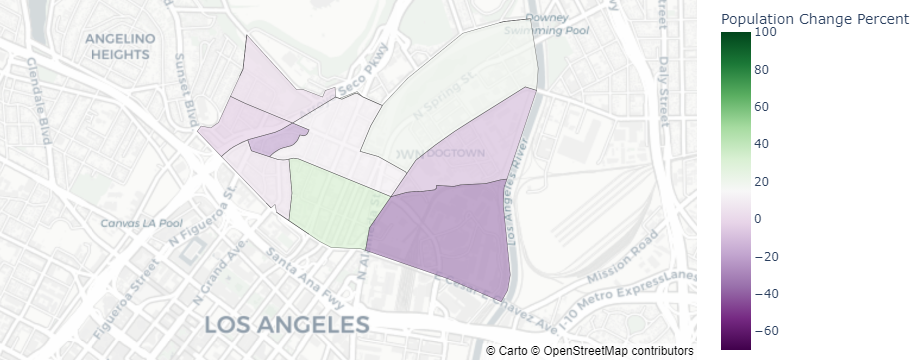

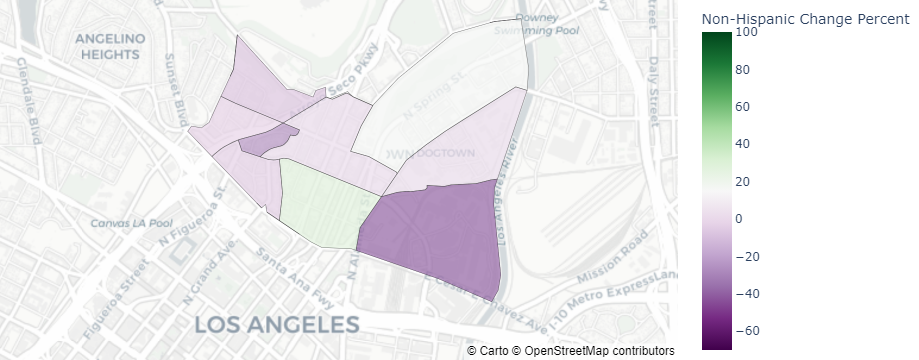

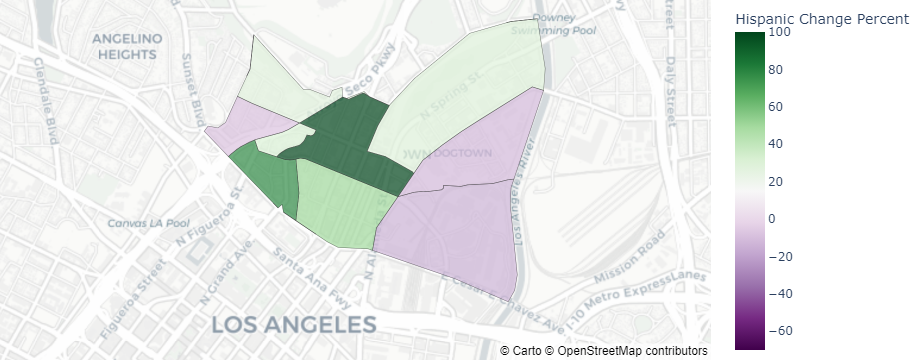

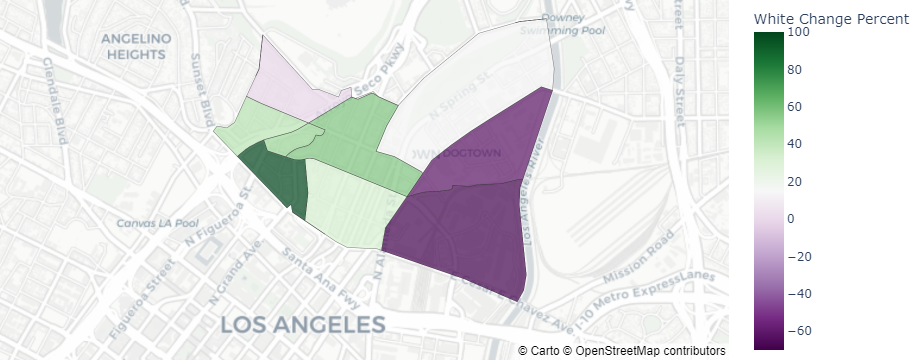

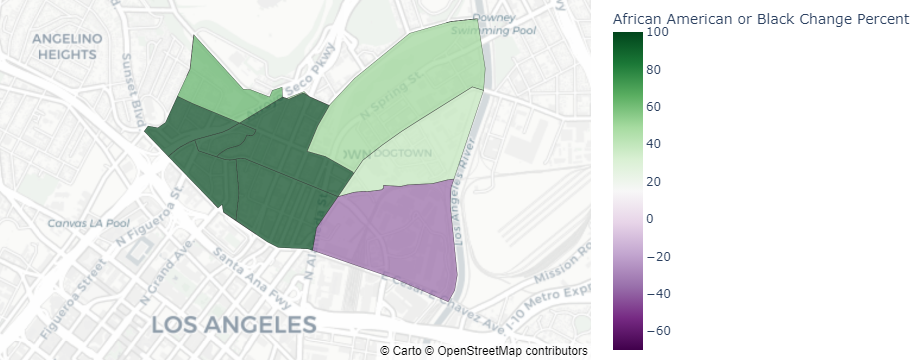

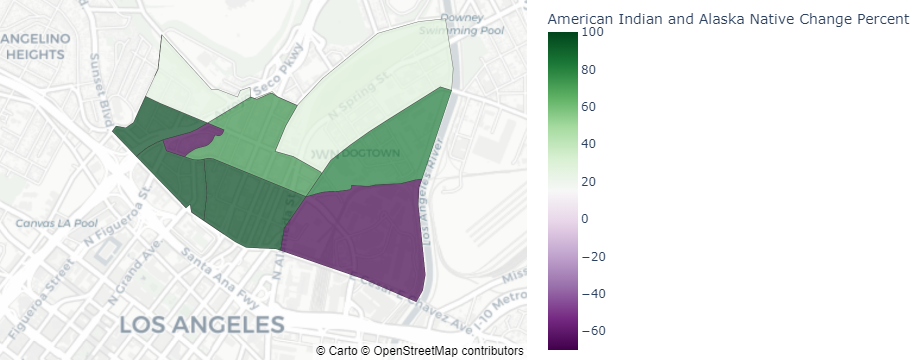

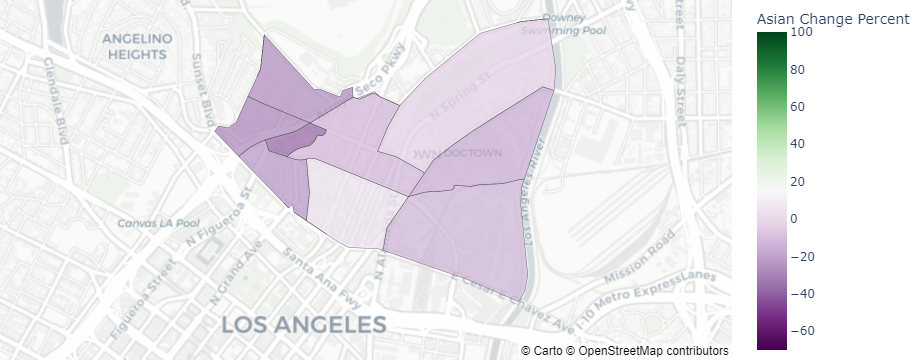

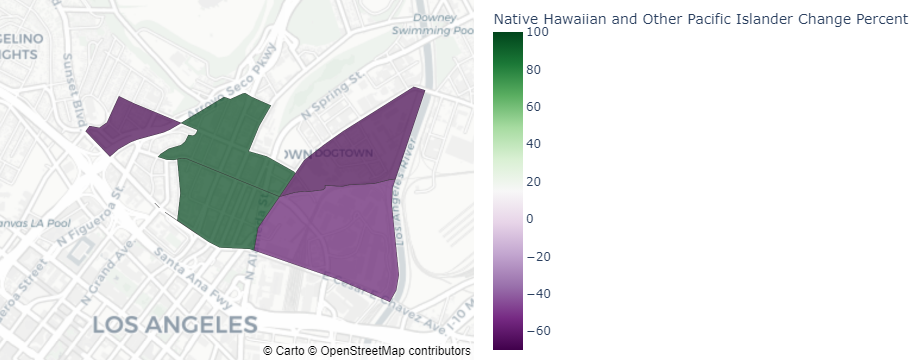

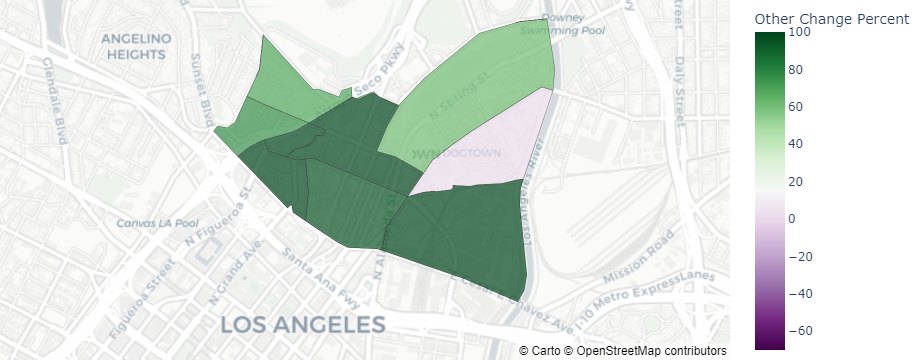

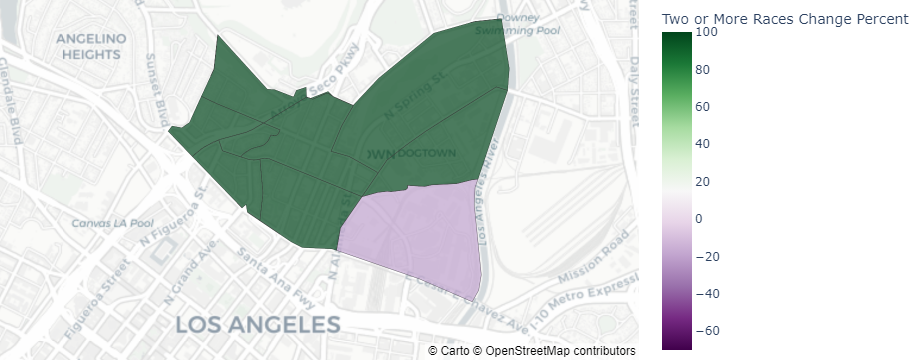

In [23]:
for race in race_list:
    race_change_map_plt(race)

#### Using Folium

In [24]:
def race_change_map(race):
    race_change_map = folium.Map(location = [34.0623, -118.2383], tiles = 'OpenStreetMap', zoom_start = 15) # Chinatown coordinates from Google
    folium.Choropleth(geo_data = chinatown_race_change,
                      data = chinatown_race_change,
                      columns = ['GEOID', race],
                      key_on = 'feature.properties.GEOID',
                      fill_color = 'RdYlGn',
                      line_weight=0.1, 
                      fill_opacity=0.8,
                      line_opacity=0.2,
                      legend_name = race).add_to(race_change_map)
    display(race_change_map)

In [25]:
for race in race_list:
    race_change_map(race)

...